<a href="https://colab.research.google.com/github/FahimShahriarAnik/Exploring_Decision_Tree/blob/main/Fahim_Shahriar_final_copy_of_ML_HW2_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Decision Tree Homework

# Generating my own dataset in ARFF format

### comment on how I designed the dataset


The dataset represents a scenario where **we are predicting whether an airplane will reach its destination on time or not based on several features**. The dataset includes 50 data points with 10 features describing various aspects of the airplane's current flight conditions.

*   The target variable is 'Class', indicating whether the airplane will reach on time ('yes') or not ('no').


*   The features include 'Current_altitude', 'Current_speed', 'Average_speed', 'Time_remaining', which are numerical variables representing the airplane's altitude, speed, and time left to reach the destination.

*   Additionally, categorical features like 'Make' (the aircraft's brand), 'Airlines' (the operating airline), 'Wind_direction' (indicating if the wind is in favor), and 'Weather_condition' (describing the current weather conditions) are included. The numerical variable 'Wind_speed' captures the speed of the wind during the flight.

**This dataset is designed to test a decision tree classifier by predicting the likelihood of on-time arrival based on flight and environmental conditions.**








In [ ]:
pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=58674ca52b8d80661884aebd8ddac81cfcd363cd95e4e153923eeefe7c78bd39
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [ ]:
import random
import arff
import pandas as pd


# Define the number of data points
n = 50

# Aircraft companies and airline companies for categorical features
aircraft_companies = ['Boeing', 'Airbus', 'Bombardier', 'Embraer', 'Lockheed Martin']
airlines_companies = ['Delta', 'United', 'American Airlines', 'Southwest', 'Lufthansa']
weather_conditions = ['good', 'bad', 'very good', 'very bad', 'excellent']
wind_directions = ['in favor', 'not in favor']

# Generate data
data = []
for _ in range(n):
    current_altitude = random.randint(5000, 35000)
    current_speed = round(random.uniform(500, 1500), 2)
    average_speed = round(random.uniform(250, 1200), 2)
    time_remaining = round(random.uniform(4, 12), 2)
    make = random.choice(aircraft_companies)
    airlines = random.choice(airlines_companies)
    wind_direction = random.choice(wind_directions)
    weather_condition = random.choice(weather_conditions)
    wind_speed = round(random.uniform(150, 350), 2)
    class_label = random.choice(['yes', 'no'])

    data.append([current_altitude, current_speed, average_speed, time_remaining, make, airlines, wind_direction, weather_condition, wind_speed, class_label ])

# Load the data into a pandas DataFrame
columns = ['Class', 'Current_altitude', 'Current_speed', 'Average_speed', 'Time_remaining', 'Make', 'Airlines', 'Wind_direction', 'Weather_condition', 'Wind_speed']
df = pd.DataFrame(data, columns=columns)
print(df)

# Define the ARFF structure
arff_data = {
    'relation': 'airplane_on_time_prediction',
    'attributes': [
        ('Class', ['yes', 'no']),
        ('Current_altitude', 'NUMERIC'),
        ('Current_speed', 'NUMERIC'),
        ('Average_speed', 'NUMERIC'),
        ('Time_remaining', 'NUMERIC'),
        ('Make', aircraft_companies),
        ('Airlines', airlines_companies),
        ('Wind_direction', wind_directions),
        ('Weather_condition', weather_conditions),
        ('Wind_speed', 'NUMERIC')
    ],
    'data': data
}

# Write ARFF file
with open('airplane_on_time_prediction.arff', 'w') as f:
    arff.dump(arff_data, f)

print("ARFF file created: airplane_on_time_prediction.arff")


    Class  Current_altitude  Current_speed  Average_speed   Time_remaining  \
0   14509            743.69         571.01          10.07  Lockheed Martin   
1   17906           1075.10         253.40           4.89           Airbus   
2    9541           1075.32         678.72           5.67           Airbus   
3   18833            789.32        1185.87           9.48       Bombardier   
4   28131           1316.46         264.70          10.27  Lockheed Martin   
5   26706           1048.47        1156.88           9.68           Boeing   
6   26359            989.23         280.51           5.43           Airbus   
7   17950           1175.78         848.47           6.77          Embraer   
8   28926           1054.32         892.45           4.04  Lockheed Martin   
9   23509            685.70         534.73          10.67           Airbus   
10  23135           1035.73         765.09           4.64          Embraer   
11  15756           1426.76         899.74           5.59       

# DT on Adult dataset


## Section 1: Introduction and Dataset Loading

In [ ]:
# In this section, we will import necessary libraries and load the dataset. We will use the 'adult' dataset from OpenML.
import pandas as pd
from sklearn.datasets import fetch_openml

In [ ]:
# Load the dataset
adult_data = fetch_openml(data_id=1590, as_frame=True)
loaded_df = adult_data.frame
print(loaded_df.head())
pd.set_option("display.max_columns", None)

   age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-country  class  
0       

## Section 2: Data Preprocessing

In [ ]:
# In this section, we will clean and preprocess the data, including handling missing values and encoding categorical features.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

In [ ]:
# seeing the size in reduction before and after dropping na
# also checking missing values in each column
print(loaded_df.shape)
df=loaded_df.copy()
print(df.isna().sum())
# Check for missing values and handle them
df.dropna(inplace=True)
print(df.shape)

(48842, 15)
age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64
(45222, 15)


## Section 3: transforming columns using encoding

In [ ]:
transformed_df = df.copy()
# as education-num column already has ordinal numbering, I'll drop the education column
transformed_df.drop('education', axis =1, inplace = True)

# categorical has 2 types, ordinal and nominal.
# Ordinal Encoding is suitable when categorical variables have an inherent order or ranking.
# only one ordinal column found that is already encoded

# One-Hot Encoding is useful when the categories have no natural order
one_hot_categorical_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded_data = one_hot_encoder.fit_transform(transformed_df[one_hot_categorical_columns])
# Label Encoding is appropriate when encoding target variables, especially for categorical variables with no inherent order.
# will do it later

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(one_hot_categorical_columns))

# Concatenate the encoded features with the remaining numerical features
transformed_df = pd.concat([transformed_df.drop(one_hot_categorical_columns, axis=1), encoded_df], axis=1)

numerical_columns = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

label_encoder = LabelEncoder()
transformed_df['class'] = label_encoder.fit_transform(transformed_df['class'])

print(transformed_df.dtypes)
#print(transformed_df.head())

age                               float64
fnlwgt                            float64
education-num                     float64
capital-gain                      float64
capital-loss                      float64
                                   ...   
native-country_Thailand           float64
native-country_Trinadad&Tobago    float64
native-country_United-States      float64
native-country_Vietnam            float64
native-country_Yugoslavia         float64
Length: 82, dtype: object


In [ ]:
# Standardizing the dataset
scaler = StandardScaler()
transformed_df[numerical_columns] = scaler.fit_transform(transformed_df[numerical_columns])
print(transformed_df.shape)
#print(transformed_df.head())

print(scaler.get_feature_names_out(numerical_columns))

(48561, 82)
['age' 'fnlwgt' 'capital-gain' 'capital-loss' 'hours-per-week']


## Section 4: Split dataset in train and test


In [ ]:
from sklearn.model_selection import train_test_split


transformed_df.dropna(inplace=True)
# Split the dataset into features and target
y = transformed_df['class']
X = transformed_df.drop(columns='class')

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33506, 81)
(8377, 81)
(33506,)
(8377,)


In [ ]:
######## trying gridsearch approach to find best model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(random_state=42,)

params = [
         {'max_depth': [5, 9, 13],
         'min_samples_split': [10, 8 , 5],
         'min_samples_leaf': [5, 4,3],
          'max_leaf_nodes': [20, 25,30],
          'max_features': ['sqrt', 'log2',None],
          }

          ]
gs_dt = GridSearchCV(clf,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

gs_dt.fit(X_train, y_train)
gs_dt.best_params_

{'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': 30,
 'min_samples_leaf': 5,
 'min_samples_split': 10}

## Section 5: Train decision tree

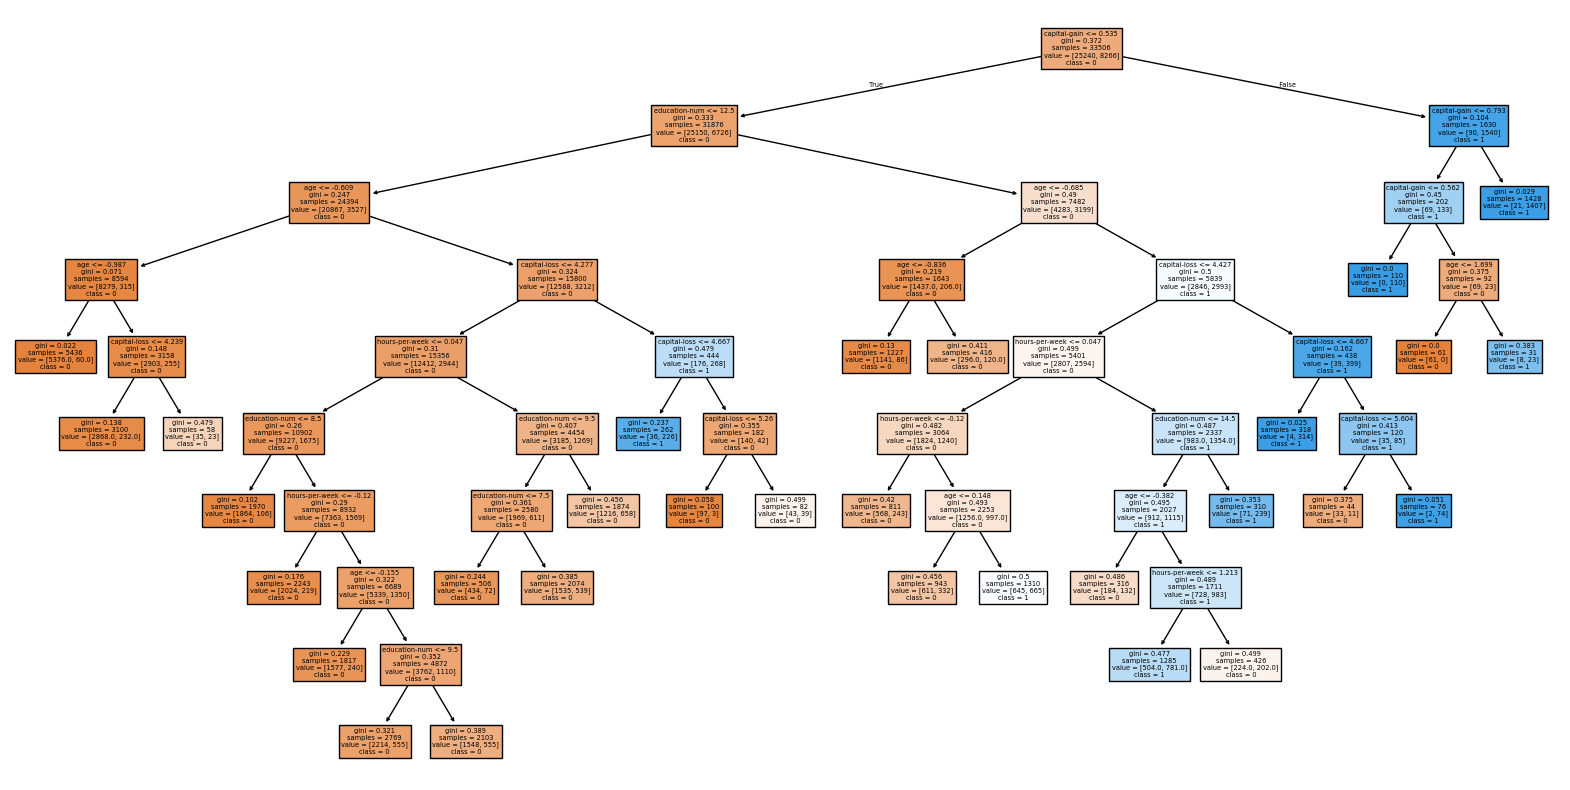

In [ ]:
# In this section, we will use the scikit-learn tree module to train a decision tree model and do the hyperparameter tuning we got from cross validation
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


clf = DecisionTreeClassifier(
    random_state=42,
    max_depth=9,  # Restrict the depth of the tree
    min_samples_split=10,  # Minimum samples required to split a node
    min_samples_leaf=5,  # Minimum samples required at each leaf node
    max_leaf_nodes=30,  # Limit the number of leaf nodes
    max_features=None  # Use a subset of features at each split
)

clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=clf.classes_.astype(str))
plt.show()

## Section 6: Perform 10-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np


kf = KFold(n_splits=10, shuffle=True, random_state=42)

errors = []

for i in range(10):
    scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring='accuracy')
    error = 1 - scores.mean()
    errors.append(error)

mean_error = np.mean(errors)
std_error = np.std(errors)

print(len(errors))

print(f'Mean Error over 10 experiments: {mean_error}')
print(f'Standard Deviation of Error: {std_error}')


10
Mean Error over 10 experiments: 0.17340154197677685
Standard Deviation of Error: 2.7755575615628914e-17


## Section 7: Test Performance on test set

In [ ]:

# Evaluate the model on the test set to get an unbiased estimate of its performance
test_score = clf.score(X_test, y_test)
print(f'Final Test Accuracy: {test_score}')

# Predict on the test set and display detailed performance
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Final Test Accuracy: 0.8259520114599499
Confusion Matrix:
[[5962  327]
 [1131  957]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6289
           1       0.75      0.46      0.57      2088

    accuracy                           0.83      8377
   macro avg       0.79      0.70      0.73      8377
weighted avg       0.82      0.83      0.81      8377



# DT on Credit Approval dataset


## Section 1: Introduction and Dataset Loading

In [ ]:
# In this section, we will import necessary libraries and load the dataset. We will use the 'adult' dataset from OpenML.
import pandas as pd
from sklearn.datasets import fetch_openml

In [ ]:
# Load the dataset
credit_approval_data = fetch_openml(data_id=29, as_frame=True)
loaded_df = credit_approval_data.frame
print(loaded_df.head())
pd.set_option("display.max_columns", None)

  A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15 class
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  202.0    0     +
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43.0  560     +
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  280.0  824     +
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100.0    3     +
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120.0    0     +


## Section 2: Data Preprocessing

In [ ]:
# In this section, we will clean and preprocess the data, including handling missing values and encoding categorical features.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

In [ ]:
# got rid of all the null rows and looked at the categories in categorical columns.

df=loaded_df.copy()

print(df.shape)
# Printing the number of missing values
missing_values = df.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)

df.dropna(inplace=True)
print(df.shape)

# Printing types of entries for categorical columns
categorical_columns = df.select_dtypes(include='category').columns
print("Types of entries for categorical columns:")
for col in categorical_columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

(690, 16)
Number of missing values in each column:
A1       12
A2       12
A3        0
A4        6
A5        6
A6        9
A7        9
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14      13
A15       0
class     0
dtype: int64
(653, 16)
Types of entries for categorical columns:
Column: A1
A1
b    450
a    203
Name: count, dtype: int64


Column: A4
A4
u    499
y    152
l      2
Name: count, dtype: int64


Column: A5
A5
g     499
p     152
gg      2
Name: count, dtype: int64


Column: A6
A6
c     133
q      75
w      63
i      55
aa     52
ff     50
k      48
cc     40
m      38
x      36
d      26
e      24
j      10
r       3
Name: count, dtype: int64


Column: A7
A7
v     381
h     137
ff     54
bb     53
j       8
z       8
dd      6
n       4
o       2
Name: count, dtype: int64


Column: A9
A9
t    349
f    304
Name: count, dtype: int64


Column: A10
A10
f    366
t    287
Name: count, dtype: int64


Column: A12
A12
f    351
t    302
Name: count, dtype: i

## Section 3: transforming columns using encoding

In [ ]:
# there is no inherent order for any categorical columns so I did one hot encoding on each of them
transformed_df = df.copy()

one_hot_categorical_columns = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded_data = one_hot_encoder.fit_transform(transformed_df[one_hot_categorical_columns])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(one_hot_categorical_columns))

# Concatenate the encoded features with the remaining numerical features
transformed_df = pd.concat([transformed_df.drop(one_hot_categorical_columns, axis=1), encoded_df], axis=1)

numerical_columns = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']

label_encoder = LabelEncoder()
transformed_df['class'] = label_encoder.fit_transform(transformed_df['class'])

print(transformed_df.shape)

(689, 38)


## Section 4: Split dataset in train and test


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV


transformed_df.dropna(inplace=True)
# Split the dataset into features and target
y = transformed_df['class']
X = transformed_df.drop(columns='class')  # assuming 'class' is the target

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(493, 37)
(124, 37)
(493,)
(124,)


In [ ]:
######## trying gridsearch approach to find best model
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(random_state=42,)

params = [
         {'max_depth': [5, 9, 13],
         'min_samples_split': [10, 8 , 5],
         'min_samples_leaf': [5, 4,3],
          'max_leaf_nodes': [20, 25,30],
          'max_features': ['sqrt', 'log2',None],
          }

          ]
gs_dt = GridSearchCV(clf,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

gs_dt.fit(X_train, y_train)
gs_dt.best_params_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 8}

## Section 5: Train decision tree

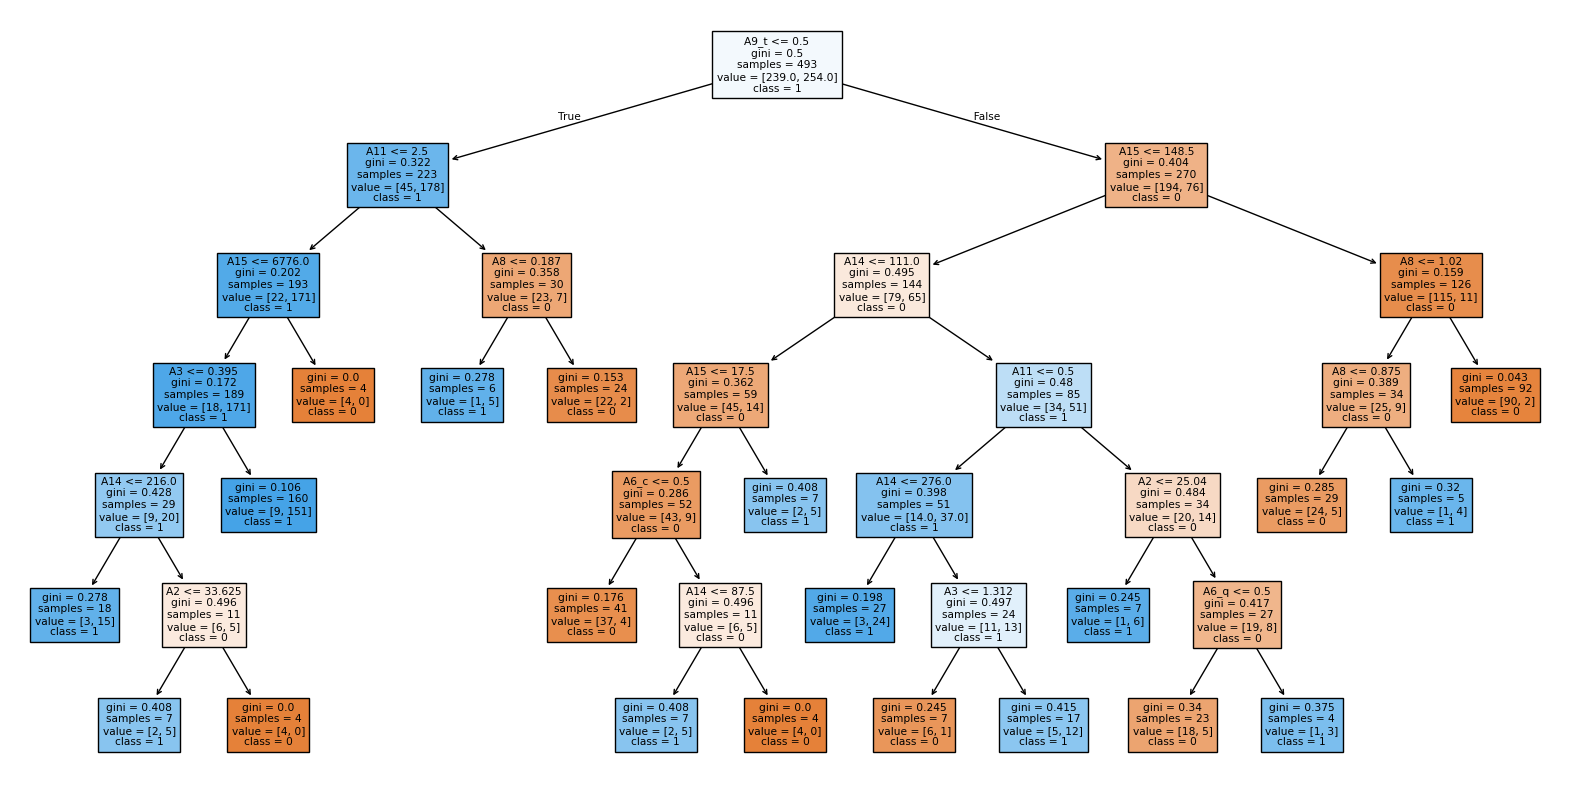

In [ ]:
# In this section, we will use the scikit-learn tree module to train a decision tree model.
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(
    random_state=42,
    max_depth=9,  # Restrict the depth of the tree
    min_samples_split=8,  # Minimum samples required to split a node
    min_samples_leaf=4,  # Minimum samples required at each leaf node
    max_leaf_nodes=20,  # Limit the number of leaf nodes
    max_features=None  # Use a subset of features at each split
)

clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=clf.classes_.astype(str))
plt.show()

## Section 6: Perform 10 10-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np


kf = KFold(n_splits=10, shuffle=True, random_state=42)

errors = []

for i in range(10):
    scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring='accuracy')
    error = 1 - scores.mean()
    errors.append(error)

mean_error = np.mean(errors)
std_error = np.std(errors)

print(len(errors))

print(f'Mean Error over 10 experiments: {mean_error}')
print(f'Standard Deviation of Error: {std_error}')


10
Mean Error over 10 experiments: 0.2351836734693878
Standard Deviation of Error: 5.551115123125783e-17


## Section 7: Test Performance on test set

In [ ]:

# Evaluate the model on the test set to get an unbiased estimate of its performance
test_score = clf.score(X_test, y_test)
print(f'Final Test Accuracy: {test_score}')

# Predict on the test set and display detailed performance
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Final Test Accuracy: 0.782258064516129
Confusion Matrix:
[[39 18]
 [ 9 58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        57
           1       0.76      0.87      0.81        67

    accuracy                           0.78       124
   macro avg       0.79      0.77      0.78       124
weighted avg       0.79      0.78      0.78       124



# DT on Sick dataset


## Section 1: Introduction and Dataset Loading

In [ ]:
# In this section, we will import necessary libraries and load the dataset. We will use the 'adult' dataset from OpenML.
import pandas as pd
from sklearn.datasets import fetch_openml

In [ ]:
# Load the dataset
sick_data = fetch_openml(data_id=45059, as_frame=True)
loaded_df = sick_data.frame
print(loaded_df.head())
pd.set_option("display.max_columns", None)

    age    TSH    TT4   T4U    FTI sex on_thyroxine query_on_thyroxine  \
0  51.0  0.005  132.0  0.95  139.0   M            t                  f   
1  59.0  0.700   87.0  1.00   87.0   M            f                  f   
2  65.0  0.320   96.0  1.40   69.0   F            f                  f   
3  66.0  0.050  133.0  1.02  130.0   M            f                  f   
4  65.0  0.470  154.0  0.75  204.0   F            t                  f   

  on_antithyroid_medication sick pregnant thyroid_surgery I131_treatment  \
0                         f    f        f               f              f   
1                         f    f        f               f              f   
2                         f    f        f               f              f   
3                         f    f        f               f              f   
4                         f    f        f               f              f   

  query_hypothyroid query_hyperthyroid lithium goitre tumor hypopituitary  \
0                 f  

## Section 2: Data Preprocessing

In [ ]:
# In this section, we will clean and preprocess the data, including handling missing values and encoding categorical features.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

In [ ]:
# got rid of all the null rows and looked at the categories in categorical columns.

df=loaded_df.copy()

print(df.shape)
# Printing the number of missing values
missing_values = df.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)

df.dropna(inplace=True)
print(df.shape)

# Printing types of entries for categorical columns
categorical_columns = df.select_dtypes(include='category').columns
print("Types of entries for categorical columns:")
for col in categorical_columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

(3103, 23)
Number of missing values in each column:
age                          0
TSH                          0
TT4                          0
T4U                          0
FTI                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
T3_measured                  0
referral_source              0
class                        0
dtype: int64
(3103, 23)
Types of entries for categorical columns:
Column: sex
sex
F    2113
M     990
Name: count, dtype: int64


Column: on_thyroxine
on_thyroxine
f    2699
t     404
Name: count, dtype: int64


Column: query_on_thyrox

## Section 3: transforming columns using encoding

In [ ]:
# there is no inherent order for any categorical columns so I did one hot encoding on each of them
transformed_df = df.copy()


print("shape before transformation")
print(transformed_df.shape)

one_hot_categorical_columns = [
    "sex",
    "on_thyroxine",
    "query_on_thyroxine",
    "on_antithyroid_medication",
    "sick",
    "pregnant",
    "thyroid_surgery",
    "I131_treatment",
    "query_hypothyroid",
    "query_hyperthyroid",
    "lithium",
    "goitre",
    "tumor",
    "hypopituitary",
    "psych",
    "T3_measured",
    "referral_source"
]
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded_data = one_hot_encoder.fit_transform(transformed_df[one_hot_categorical_columns])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(one_hot_categorical_columns))

# Concatenate the encoded features with the remaining numerical features
transformed_df = pd.concat([transformed_df.drop(one_hot_categorical_columns, axis=1), encoded_df], axis=1)

numerical_features = [
    "age",
    "TSH",
    "TT4",
    "T4U",
    "FTI"
]
target_variable =['class']

# label encoding of target variable

label_encoder = LabelEncoder()
transformed_df['class'] = label_encoder.fit_transform(transformed_df['class'])

print(transformed_df.dtypes)
print("shape after transformation")
print(transformed_df.shape)
print(transformed_df.head())

shape before transformation
(3103, 23)
age                            float64
TSH                            float64
TT4                            float64
T4U                            float64
FTI                            float64
class                            int64
sex_M                          float64
on_thyroxine_t                 float64
query_on_thyroxine_t           float64
on_antithyroid_medication_t    float64
sick_t                         float64
pregnant_t                     float64
thyroid_surgery_t              float64
I131_treatment_t               float64
query_hypothyroid_t            float64
query_hyperthyroid_t           float64
lithium_t                      float64
goitre_t                       float64
tumor_t                        float64
hypopituitary_t                float64
psych_t                        float64
T3_measured_t                  float64
referral_source_SVHC           float64
referral_source_SVHD           float64
referral_source_SVI      

## Section 4: Split dataset in train and test


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV


transformed_df.dropna(inplace=True)
# Split the dataset into features and target
y = transformed_df['class']
X = transformed_df.drop(columns='class')  # assuming 'class' is the target

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(2482, 25)
(621, 25)
(2482,)
(621,)


In [ ]:
######## trying gridsearch approach to find best model
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(random_state=42,)

params = [
         {'max_depth': [5, 9, 13],
         'min_samples_split': [10, 8 , 5],
         'min_samples_leaf': [5, 4,3],
          'max_leaf_nodes': [20, 25,30],
          'max_features': ['sqrt', 'log2',None],
          }

          ]
gs_dt = GridSearchCV(clf,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

gs_dt.fit(X_train, y_train)
gs_dt.best_params_


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 13,
 'max_features': 'log2',
 'max_leaf_nodes': 30,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

## Section 5: Train decision tree

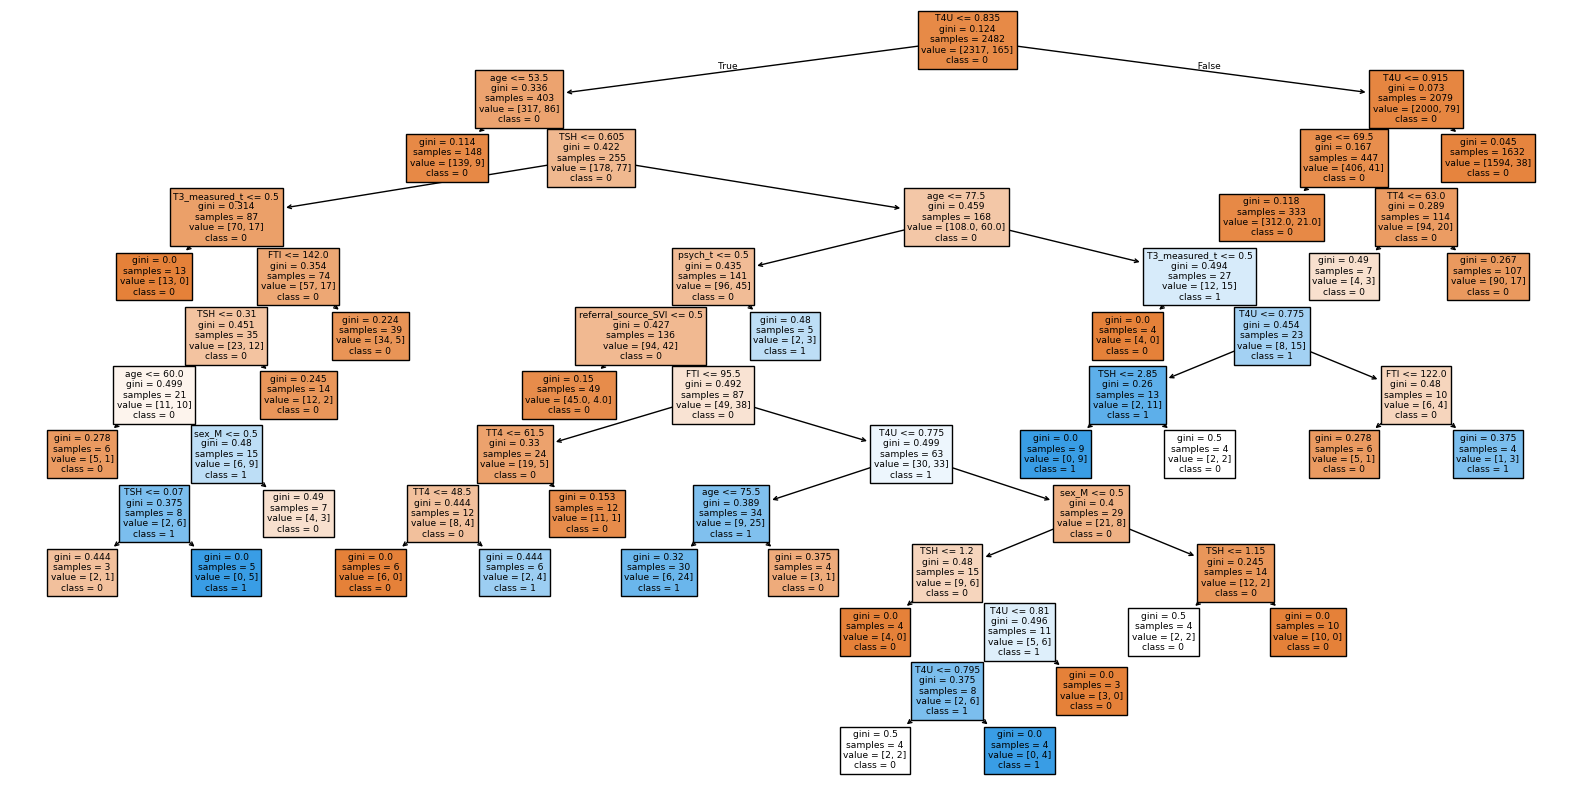

In [ ]:
# Now that we know which hyperparameters perform best, we will use that classifier
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier(random_state=42,max_depth=13,min_samples_split=8, min_samples_leaf=3, max_leaf_nodes=30, max_features='log2')
clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=clf.classes_.astype(str))
plt.show()

## Section 6: Perform 10 10-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np


kf = KFold(n_splits=10, shuffle=True, random_state=42)

errors = []

for i in range(10):
    scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring='accuracy')
    error = 1 - scores.mean()
    errors.append(error)

mean_error = np.mean(errors)
std_error = np.std(errors)

print(len(errors))

print(f'Mean Error over 10 experiments: {mean_error}')
print(f'Standard Deviation of Error: {std_error}')


10
Mean Error over 10 experiments: 0.07212236040937936
Standard Deviation of Error: 0.0


## Section 7: Test Performance on test set

In [ ]:

# Evaluate the model on the test set to get an unbiased estimate of its performance
test_score = clf.score(X_test, y_test)
print(f'Final Test Accuracy: {test_score}')

# Predict on the test set and display detailed performance
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Final Test Accuracy: 0.9146537842190016
Confusion Matrix:
[[560  11]
 [ 42   8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       571
           1       0.42      0.16      0.23        50

    accuracy                           0.91       621
   macro avg       0.68      0.57      0.59       621
weighted avg       0.89      0.91      0.90       621

